In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from statsmodels.formula.api import ols      # For n-way ANOVA
from statsmodels.stats.anova import _get_covariance,anova_lm # For n-way ANOVA
%matplotlib inline

# Problem 1:

## A research laboratory was developing a new compound for the relief of severe cases of hay fever. In an experiment with 36 volunteers, the amounts of the two active ingredients (A & B) in the compound were varied at three levels each. Randomization was used in assigning four volunteers to each of the nine treatments. The data on hours of relief can be found in the following 
## 1.1) State the Null and Alternate Hypothesis for conducting one-way ANOVA for both the variables ‘A’ and ‘B’ individually. [both statement and statistical form like Ho=mu, Ha>mu]

## 1.2) Perform one-way ANOVA for variable ‘A’ with respect to the variable ‘Relief’. State whether the Null Hypothesis is accepted or rejected based on the ANOVA results.

## 1.3) Perform one-way ANOVA for variable ‘B’ with respect to the variable ‘Relief’. State whether the Null Hypothesis is accepted or rejected based on the ANOVA results.

## 1.4) Analyse the effects of one variable on another with the help of an interaction plot. What is the interaction between the two treatments? [hint: use the ‘pointplot’ function from the ‘seaborn’ function]

## 1.5) Perform a two-way ANOVA based on the different ingredients (variable ‘A’ & ‘B’ along with their interaction 'A*B') with the variable 'Relief' and state your results.

## 1.6) Mention the business implications of performing ANOVA for this particular case study.

In [2]:
df = pd.read_csv('Fever.csv')

In [3]:
df.head()

A  B  Volunteer  Relief
0  1  1          1     2.4
1  1  1          2     2.7
2  1  1          3     2.3
3  1  1          4     2.5
4  1  2          1     4.6

In [4]:
df.describe()

A          B  Volunteer     Relief
count  36.000000  36.000000  36.000000  36.000000
mean    2.000000   2.000000   2.500000   7.183333
std     0.828079   0.828079   1.133893   3.272090
min     1.000000   1.000000   1.000000   2.300000
25%     1.000000   1.000000   1.750000   4.675000
50%     2.000000   2.000000   2.500000   6.000000
75%     3.000000   3.000000   3.250000   9.325000
max     3.000000   3.000000   4.000000  13.500000

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   A          36 non-null     int64  
 1   B          36 non-null     int64  
 2   Volunteer  36 non-null     int64  
 3   Relief     36 non-null     float64
dtypes: float64(1), int64(3)
memory usage: 1.2 KB


In [6]:
df.isnull().sum()

A            0
B            0
Volunteer    0
Relief       0
dtype: int64

## 1.1 State the Null and Alternate Hypothesis for conducting one-way ANOVA for both the variables ‘A’ and ‘B’ individually. [both statement and statistical form like Ho=mu, Ha>mu]

##  Postulate the Null and Alternate Hypothesis for active ingredient A

𝐻0:
     The mean relief for the voluntier is equal for A at all three levels.
         
         μA1=μA2=μA3
     
𝐻1:
     The mean relief for the voluntier is not equal in atleast one level of A. 

##  Postulate the Null and Alternate Hypothesis for active ingredient B

𝐻0:
     The mean relief for the voluntier is equal for A at all three levels.
         
         μA1=μA2=μA3
     
𝐻1:
     The mean relief for the voluntier is not equal in atleast one level of B. 

## 1.2) Perform one-way ANOVA for variable ‘A’ with respect to the variable ‘Relief’. State whether the Null Hypothesis is accepted or rejected based on the ANOVA results.

In [7]:
df.A = pd.Categorical(df.A)

In [8]:
df.A.value_counts()

3    12
2    12
1    12
Name: A, dtype: int64

In [9]:
formula = 'Relief~C(A)'
model = ols(formula, df).fit()
aov_table = anova_lm(model)
print(aov_table)

            df  sum_sq     mean_sq          F        PR(>F)
C(A)       2.0  220.02  110.010000  23.465387  4.578242e-07
Residual  33.0  154.71    4.688182        NaN           NaN


## Since the p value in this scenario is less than 𝛼 (0.05), we can say that we reject the Null Hypothesis (𝐻0).

## 1.3) Perform one-way ANOVA for variable ‘B’ with respect to the variable ‘Relief’. State whether the Null Hypothesis is accepted or rejected based on the ANOVA results.

In [10]:
df.B = pd.Categorical(df.B)
df.B.value_counts()

3    12
2    12
1    12
Name: B, dtype: int64

In [11]:
formula = 'Relief~C(B)'
model = ols(formula, df).fit()
aov_table = anova_lm(model)
print(aov_table)

            df  sum_sq    mean_sq         F   PR(>F)
C(B)       2.0  123.66  61.830000  8.126777  0.00135
Residual  33.0  251.07   7.608182       NaN      NaN


## Since the p value in this scenario is less than 𝛼 (0.05), we can say that we reject the Null Hypothesis (𝐻0).

## 1.4 Analyse the effects of one variable on another with the help of an interaction plot. What is the interaction between the two treatments? [hint: use the ‘pointplot’ function from the ‘seaborn’ function]¶

In [12]:
import matplotlib.pyplot as plt

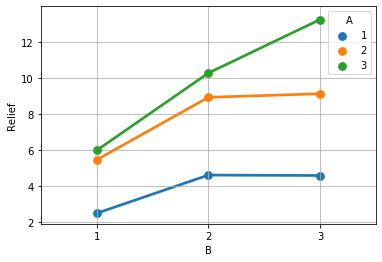

In [13]:
sns.pointplot(y = 'Relief', x = 'B', hue='A',data=df, ci=None)
plt.grid()
plt.show()

## 1.5) Perform a two-way ANOVA based on the different ingredients (variable ‘A’ & ‘B’ along with their interaction 'A*B') with the variable 'Relief' and state your results

In [14]:
import statsmodels.api as sm

In [15]:
#Interaction Effect:
formula='Relief ~  C(A)+C(B)+C(A):C(B)'
model =ols(formula, df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)


            sum_sq    df            F        PR(>F)
C(A)       220.020   2.0  1827.858462  1.514043e-29
C(B)       123.660   2.0  1027.329231  3.348751e-26
C(A):C(B)   29.425   4.0   122.226923  6.972083e-17
Residual     1.625  27.0          NaN           NaN


As the interaction between the drugs A and B is < then 0.05 we can see there is some interaction but the interaction is less significant then their individual contribution in relief

## 1.6) Mention the business implications of performing ANOVA for this particular case study.

From performing ANOVA, We can see that the the drugs A and B habe different level of relief for the volunteers.
We can understand that the volunteers gets higher relief for level 3 drug. We can also see that there is some interaction between the drugs A and B but the interaction is less significant than their individual contribution to volunteers relief

# The dataset Education - Post 12th Standard.csv is a dataset that contains the names of various colleges. This particular case study is based on various parameters of various institutions. You are expected to do Principal Component Analysis for this case study according to the instructions given in the following rubric. The data dictionary of the 'Education - Post 12th Standard.csv' can be found in the following file: Data Dictionary.xlsx.

## 2.1) Perform Exploratory Data Analysis [both univariate and multivariate analysis to be performed]. The inferences drawn from this should be properly documented.

## 2.2) Scale the variables and write the inference for using the type of scaling function for this case study. 

## 2.3) Comment on the comparison between covariance and the correlation matrix.

## 2.4) Check the dataset for outliers before and after scaling. Draw your inferences from this exercise.

## 2.5) Build the covariance matrix, eigenvalues, and eigenvector.

## 2.6) Write the explicit form of the first PC (in terms of Eigen Vectors).

## 2.7) Discuss the cumulative values of the eigenvalues. How does it help you to decide on the optimum number of principal components? What do the eigenvectors indicate? Perform PCA and export the data of the Principal Component scores into a data frame.

## 2.8) Mention the business implication of using the Principal Component Analysis for this case study. [Hint: Write Interpretations of the Principal Components Obtained]

In [16]:
data = pd.read_csv('Education+-+Post+12th+Standard.csv')
data.head()

Names  Apps  Accept  Enroll  Top10perc  Top25perc  \
0  Abilene Christian University  1660    1232     721         23         52   
1            Adelphi University  2186    1924     512         16         29   
2                Adrian College  1428    1097     336         22         50   
3           Agnes Scott College   417     349     137         60         89   
4     Alaska Pacific University   193     146      55         16         44   

   F.Undergrad  P.Undergrad  Outstate  Room.Board  Books  Personal  PhD  \
0         2885          537      7440        3300    450      2200   70   
1         2683         1227     12280        6450    750      1500   29   
2         1036           99     11250        3750    400      1165   53   
3          510           63     12960        5450    450       875   92   
4          249          869      7560        4120    800      1500   76   

   Terminal  S.F.Ratio  perc.alumni  Expend  Grad.Rate  
0        78       18.1           12    7041         60  
1        30       12.2           16   10527         56  
2        66       12.9           30    8735         54  
3        97        7.7           37   19016         59  
4        72       11.9            2   10922         15

In [17]:
dic = pd.read_excel('Data Dictionary.xlsx')
dic.head(20)

1)      Names: Names of various university and colleges
0       2)      Apps: Number of applications received     
1     3)      Accept: Number of applications accepted     
2     4)      Enroll: Number of new students enrolled     
3   5)      Top10perc: Percentage of new students ...     
4   6)      Top25perc: Percentage of new students ...     
5   7)      F.Undergrad: Number of full-time under...     
6   8)      P.Undergrad: Number of part-time under...     
7   9)      Outstate: Number of students for whom ...     
8            10)   Room.Board: Cost of Room and board     
9     11)   Books: Estimated book costs for a student     
10  12)   Personal: Estimated personal spending fo...     
11    13)   PhD: Percentage of faculties with Ph.D.’s     
12  14)   Terminal: Percentage of faculties with t...     
13             15)   S.F.Ratio: Student/faculty ratio     
14  16)   perc.alumni: Percentage of alumni who do...     
15  17)   Expend: The Instructional expenditure pe...     
16                   18)   Grad.Rate: Graduation rate

## 2.1) Perform Exploratory Data Analysis [both univariate and multivariate analysis to be performed]. The inferences drawn from this should be properly documented.

In [18]:
dupes = data.duplicated()
sum(dupes)

0

In [19]:
data.describe()

Apps        Accept       Enroll   Top10perc   Top25perc  \
count    777.000000    777.000000   777.000000  777.000000  777.000000   
mean    3001.638353   2018.804376   779.972973   27.558559   55.796654   
std     3870.201484   2451.113971   929.176190   17.640364   19.804778   
min       81.000000     72.000000    35.000000    1.000000    9.000000   
25%      776.000000    604.000000   242.000000   15.000000   41.000000   
50%     1558.000000   1110.000000   434.000000   23.000000   54.000000   
75%     3624.000000   2424.000000   902.000000   35.000000   69.000000   
max    48094.000000  26330.000000  6392.000000   96.000000  100.000000   

        F.Undergrad   P.Undergrad      Outstate   Room.Board        Books  \
count    777.000000    777.000000    777.000000   777.000000   777.000000   
mean    3699.907336    855.298584  10440.669241  4357.526384   549.380952   
std     4850.420531   1522.431887   4023.016484  1096.696416   165.105360   
min      139.000000      1.000000   2340.000000  1780.000000    96.000000   
25%      992.000000     95.000000   7320.000000  3597.000000   470.000000   
50%     1707.000000    353.000000   9990.000000  4200.000000   500.000000   
75%     4005.000000    967.000000  12925.000000  5050.000000   600.000000   
max    31643.000000  21836.000000  21700.000000  8124.000000  2340.000000   

          Personal         PhD    Terminal   S.F.Ratio  perc.alumni  \
count   777.000000  777.000000  777.000000  777.000000   777.000000   
mean   1340.642214   72.660232   79.702703   14.089704    22.743887   
std     677.071454   16.328155   14.722359    3.958349    12.391801   
min     250.000000    8.000000   24.000000    2.500000     0.000000   
25%     850.000000   62.000000   71.000000   11.500000    13.000000   
50%    1200.000000   75.000000   82.000000   13.600000    21.000000   
75%    1700.000000   85.000000   92.000000   16.500000    31.000000   
max    6800.000000  103.000000  100.000000   39.800000    64.000000   

             Expend  Grad.Rate  
count    777.000000  777.00000  
mean    9660.171171   65.46332  
std     5221.768440   17.17771  
min     3186.000000   10.00000  
25%     6751.000000   53.00000  
50%     8377.000000   65.00000  
75%    10830.000000   78.00000  
max    56233.000000  118.00000

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Names        777 non-null    object 
 1   Apps         777 non-null    int64  
 2   Accept       777 non-null    int64  
 3   Enroll       777 non-null    int64  
 4   Top10perc    777 non-null    int64  
 5   Top25perc    777 non-null    int64  
 6   F.Undergrad  777 non-null    int64  
 7   P.Undergrad  777 non-null    int64  
 8   Outstate     777 non-null    int64  
 9   Room.Board   777 non-null    int64  
 10  Books        777 non-null    int64  
 11  Personal     777 non-null    int64  
 12  PhD          777 non-null    int64  
 13  Terminal     777 non-null    int64  
 14  S.F.Ratio    777 non-null    float64
 15  perc.alumni  777 non-null    int64  
 16  Expend       777 non-null    int64  
 17  Grad.Rate    777 non-null    int64  
dtypes: float64(1), int64(16), object(1)
memory usage: 

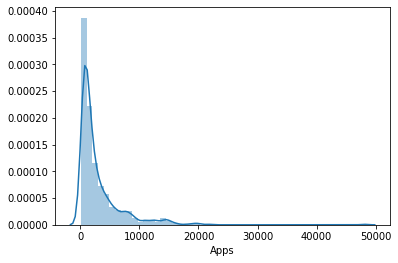

In [21]:
sns.distplot(data['Apps'])

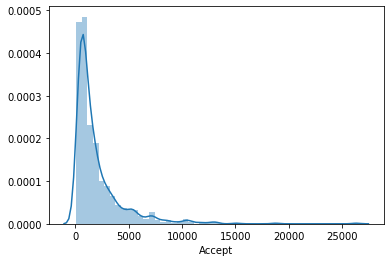

In [22]:
sns.distplot(data['Accept'])

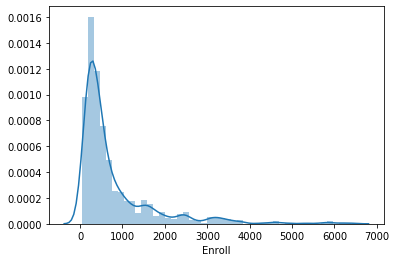

In [23]:
sns.distplot(data['Enroll'])

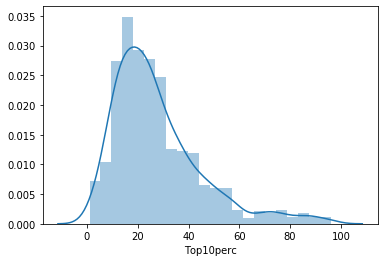

In [24]:
sns.distplot(data['Top10perc'])

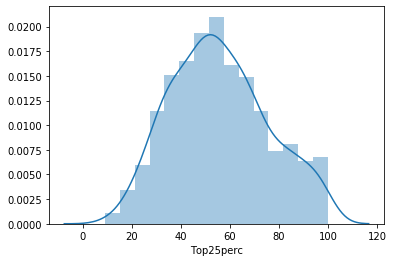

In [25]:
sns.distplot(data['Top25perc'])


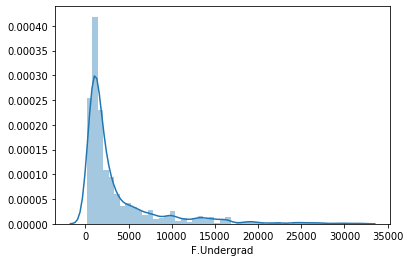

In [26]:
sns.distplot(data['F.Undergrad'])


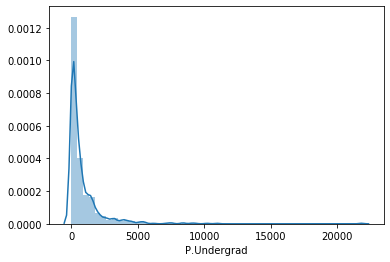

In [27]:
sns.distplot(data['P.Undergrad'])


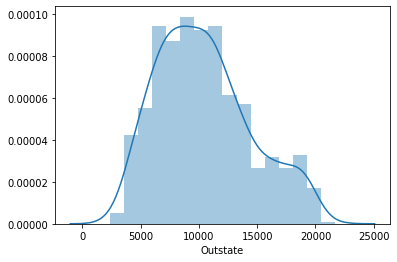

In [28]:
sns.distplot(data['Outstate'])


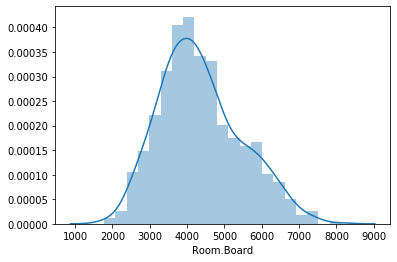

In [29]:
sns.distplot(data['Room.Board'])


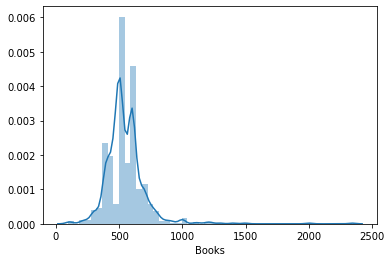

In [30]:
sns.distplot(data['Books'])


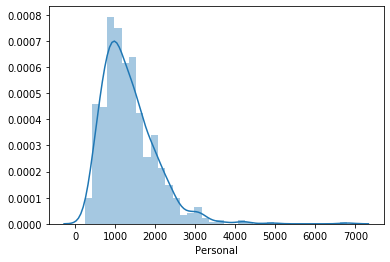

In [31]:
sns.distplot(data['Personal'])


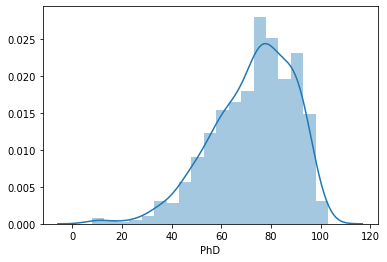

In [32]:
sns.distplot(data['PhD'])


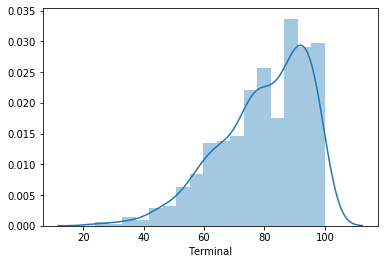

In [33]:
sns.distplot(data['Terminal'])


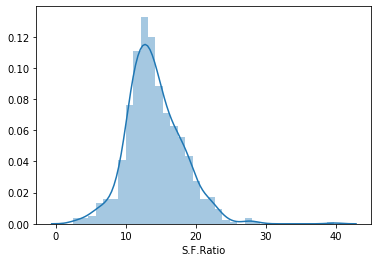

In [34]:
sns.distplot(data['S.F.Ratio'])


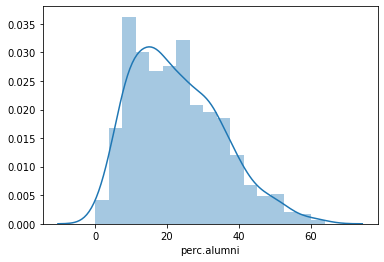

In [35]:
sns.distplot(data['perc.alumni'])


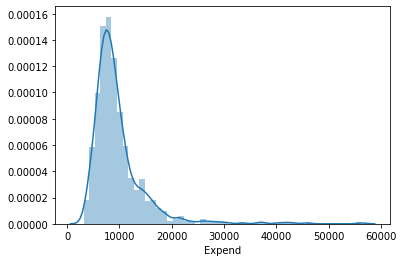

In [36]:
sns.distplot(data['Expend'])


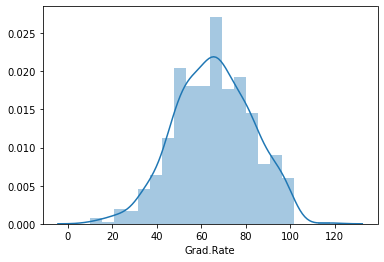

In [37]:
sns.distplot(data['Grad.Rate'])

Apps, Accept,Enroll,Top10perc,Top25perc,P.grad,Outstate these variables are right skewed,where as terminal,Phd,S.F.Ratio is Left skewed.

Also the variable books does not follow normal distribution

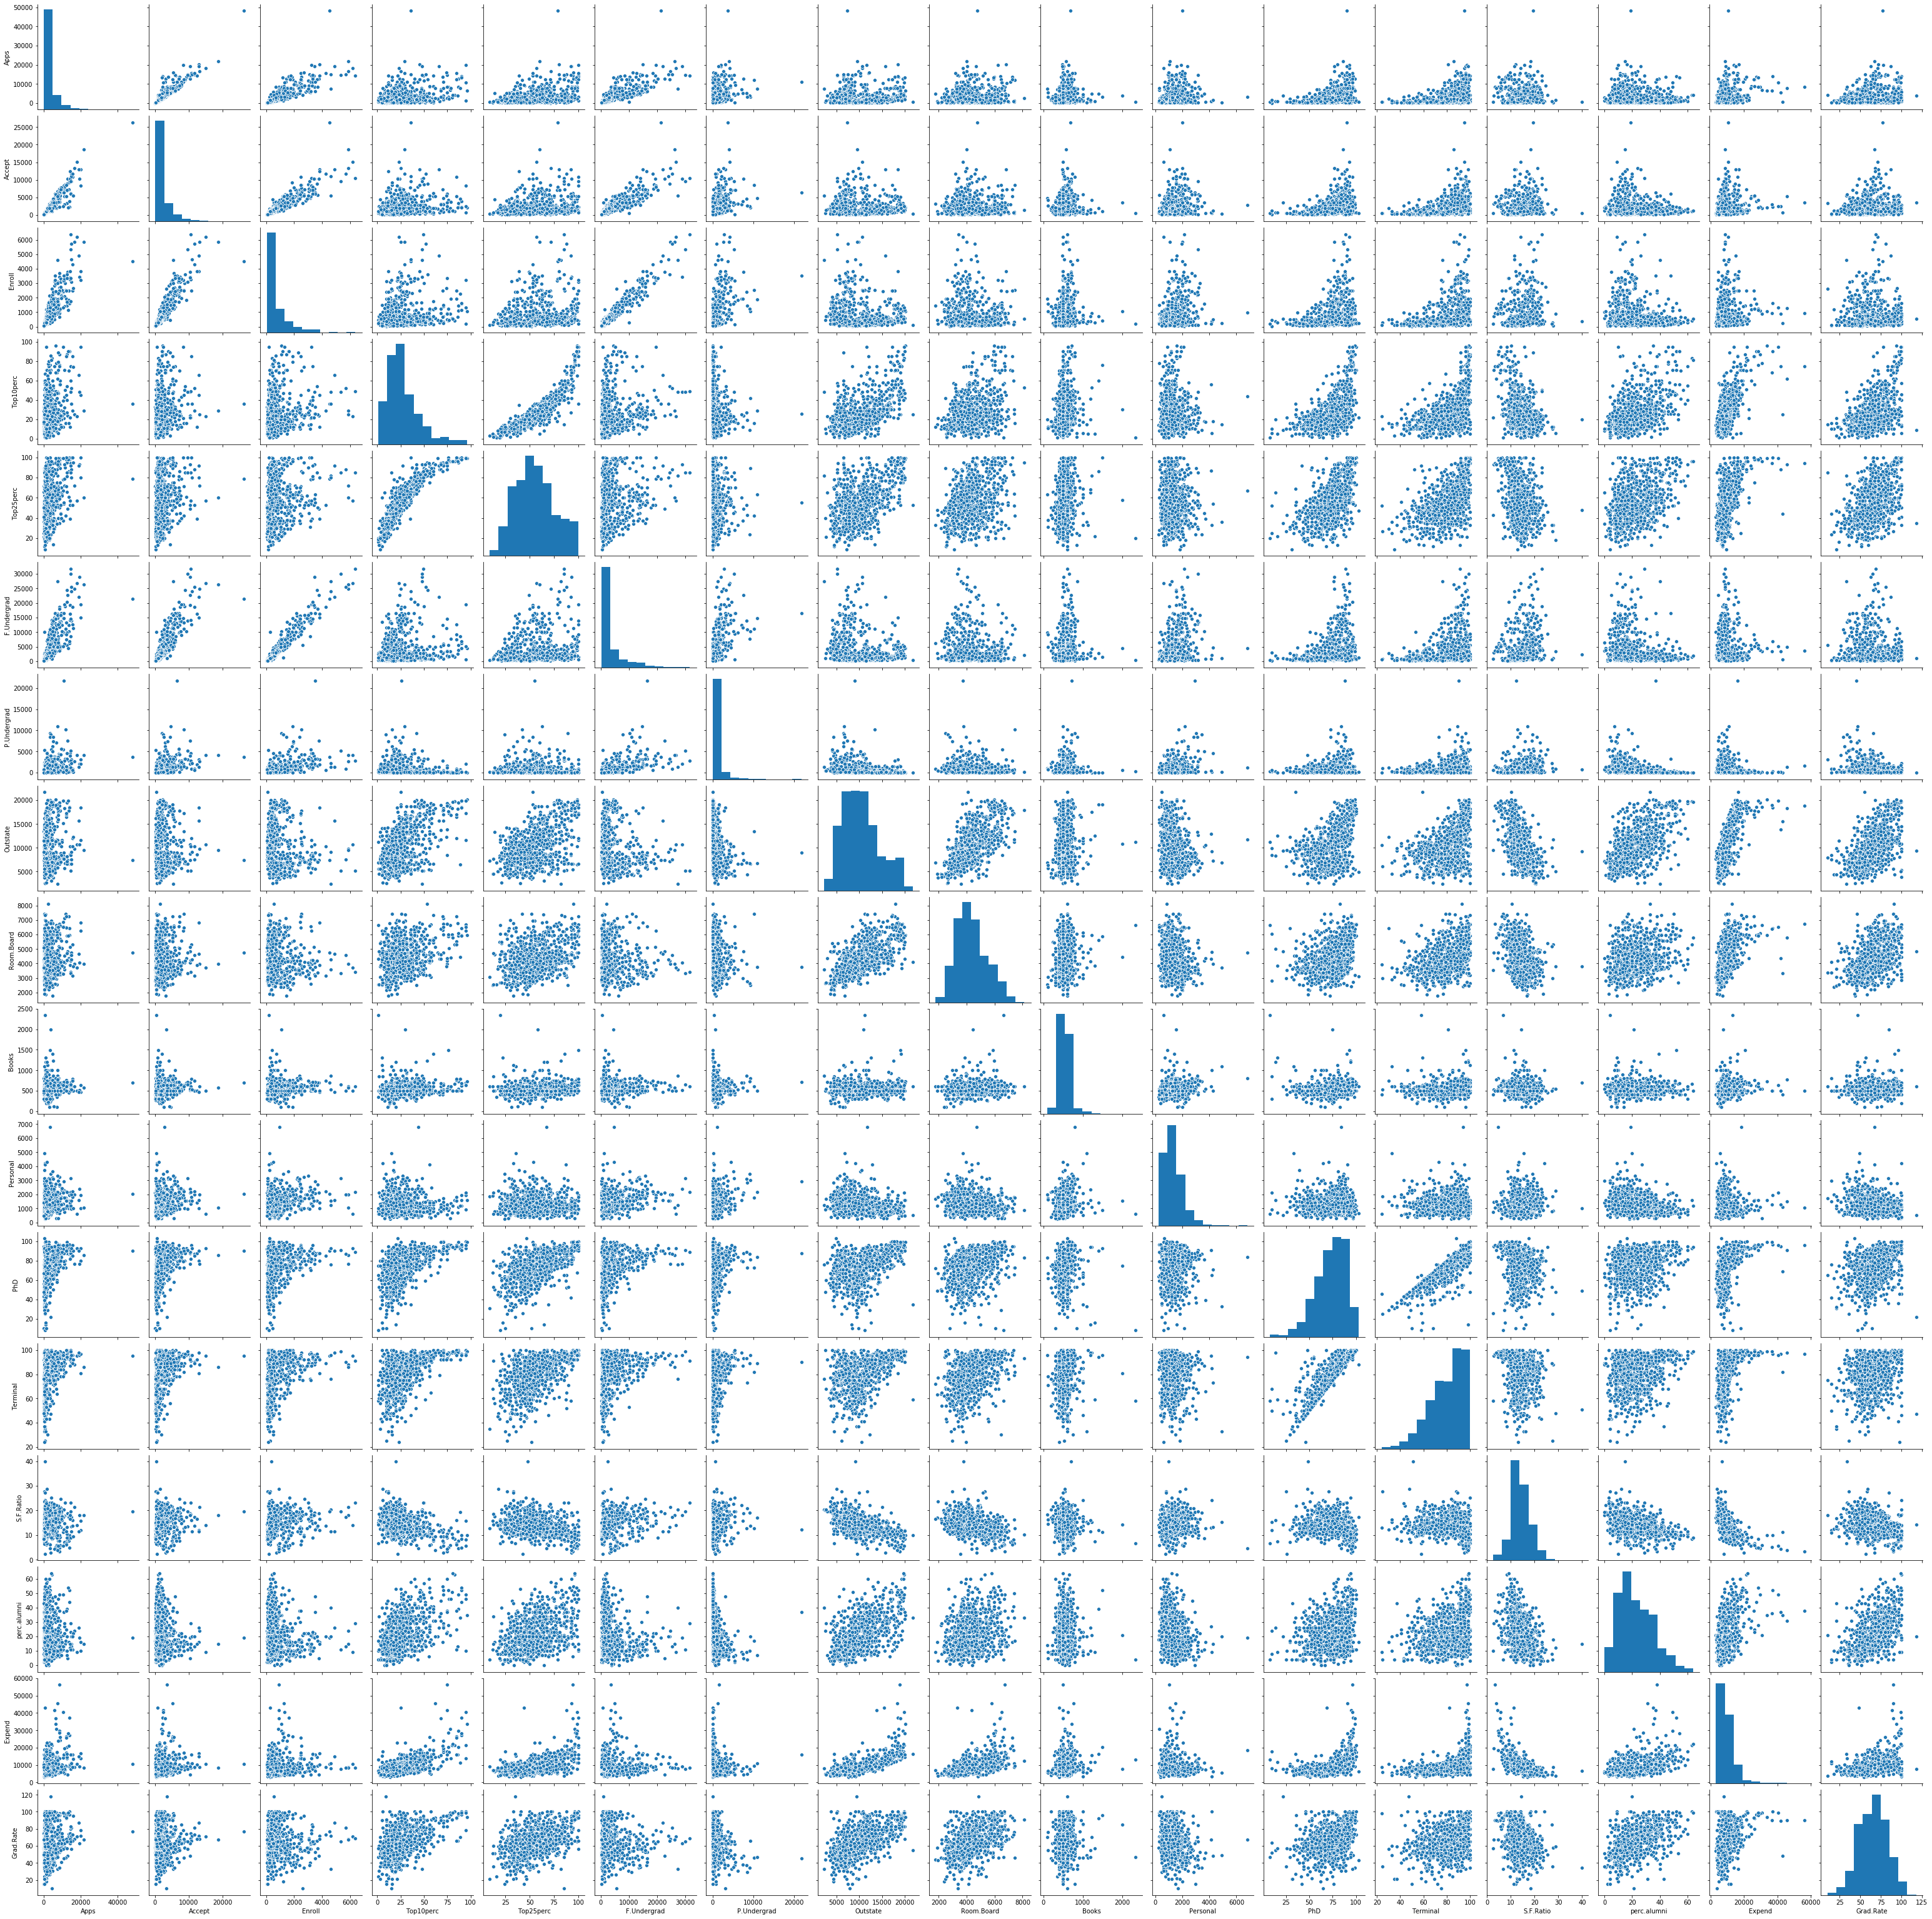

In [39]:
sns.pairplot(data_df)

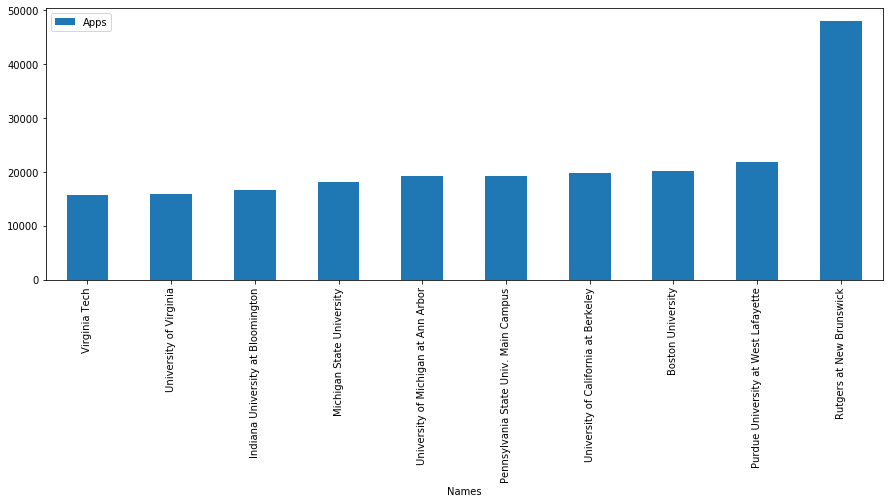

In [71]:
data.groupby(by=['Names'])['Apps'].sum().reset_index().sort_values(['Apps']).tail(10).plot(x='Names',
                                                                                                           y='Apps',
                                                                                                           kind='bar',
                                                                                                           figsize=(15,5))
plt.show()

In [ ]:
data.groupby(by=['Names'])['Apps'].sum().reset_index().sort_values(['Apps']).tail(10).plot(x='Names',
                                                                                                           y='Apps',
                                                                                                           kind='bar',
                                                                                                           figsize=(15,5))
plt.show()

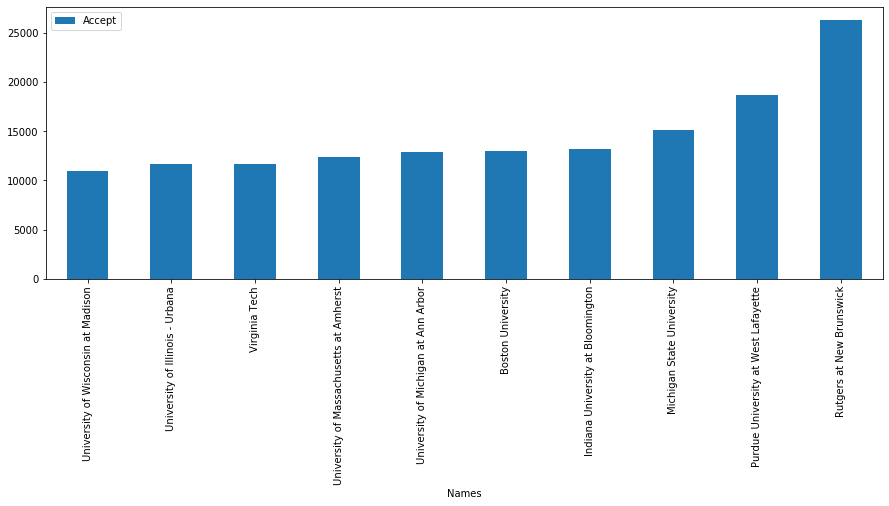

In [72]:
data.groupby(by=['Names'])['Accept'].sum().reset_index().sort_values(['Accept']).tail(10).plot(x='Names',
                                                                                                           y='Accept',
                                                                                                           kind='bar',
                                                                                                           figsize=(15,5))
plt.show()

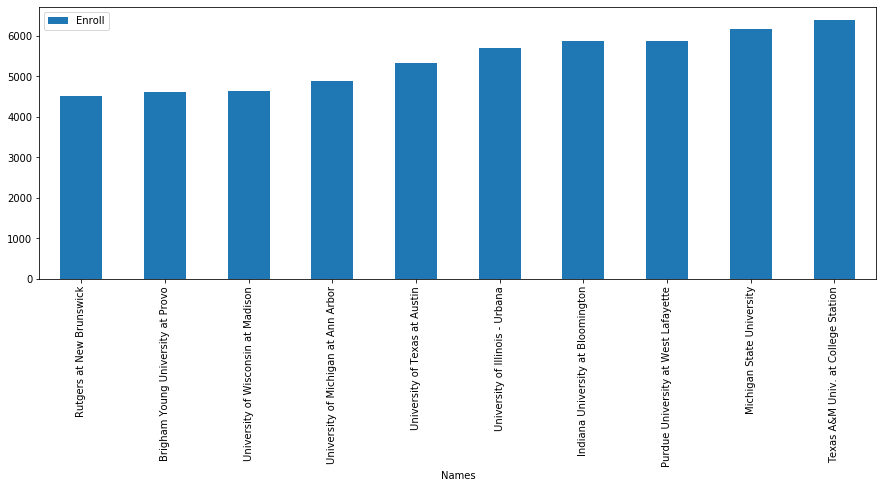

In [73]:
data.groupby(by=['Names'])['Enroll'].sum().reset_index().sort_values(['Enroll']).tail(10).plot(x='Names',
                                                                                                           y='Enroll',
                                                                                                           kind='bar',
                                                                                                           figsize=(15,5))
plt.show()

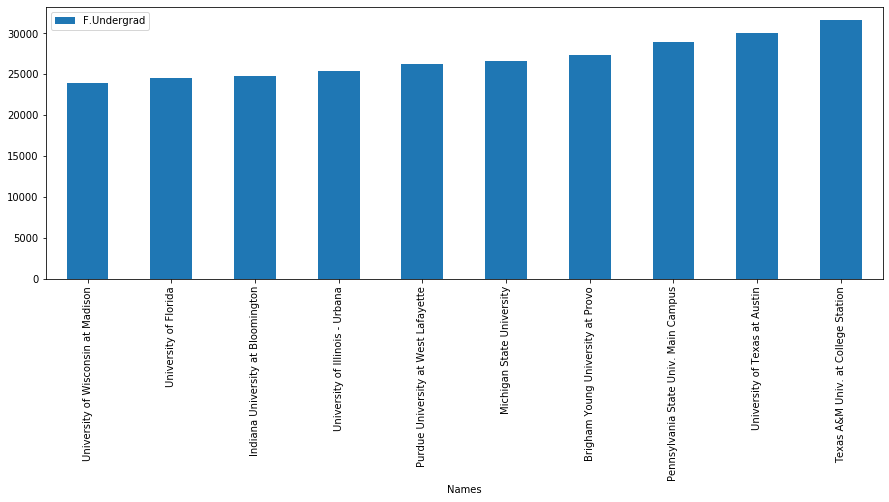

In [76]:
data.groupby(by=['Names'])['F.Undergrad'].sum().reset_index().sort_values(['F.Undergrad']).tail(10).plot(x='Names',
                                                                                                           y='F.Undergrad',
                                                                                                           kind='bar',
                                                                                                           figsize=(15,5))
plt.show()

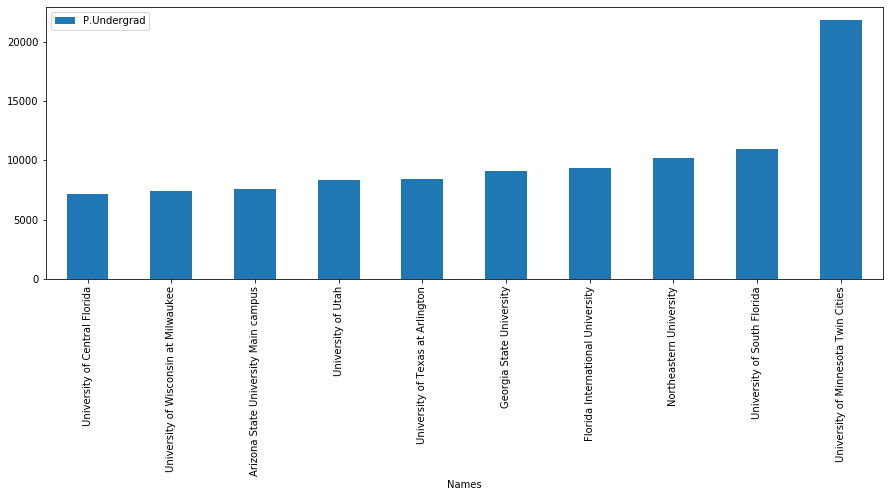

In [77]:
data.groupby(by=['Names'])['P.Undergrad'].sum().reset_index().sort_values(['P.Undergrad']).tail(10).plot(x='Names',
                                                                                                           y='P.Undergrad',
                                                                                                           kind='bar',
                                                                                                           figsize=(15,5))
plt.show()

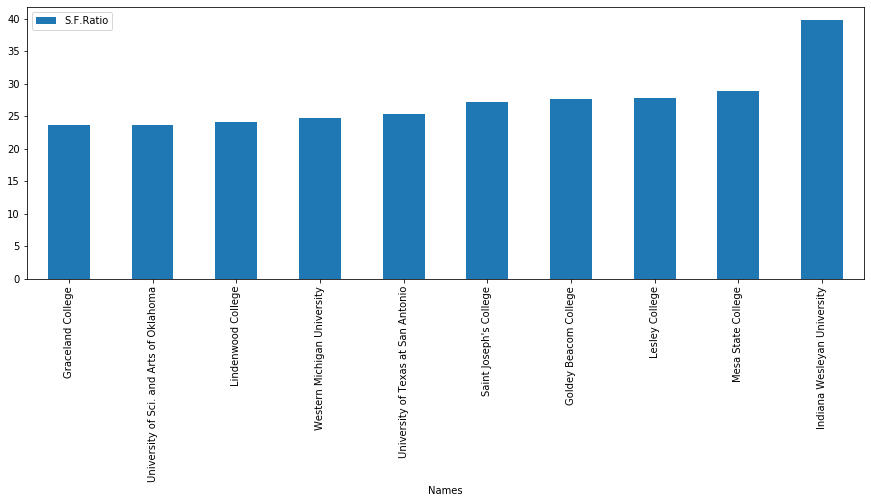

In [80]:
data.groupby(by=['Names'])['S.F.Ratio'].sum().reset_index().sort_values(['S.F.Ratio']).tail(10).plot(x='Names',
                                                                                                           y='S.F.Ratio',
                                                                                                           kind='bar',
                                                                                                           figsize=(15,5))
plt.show()

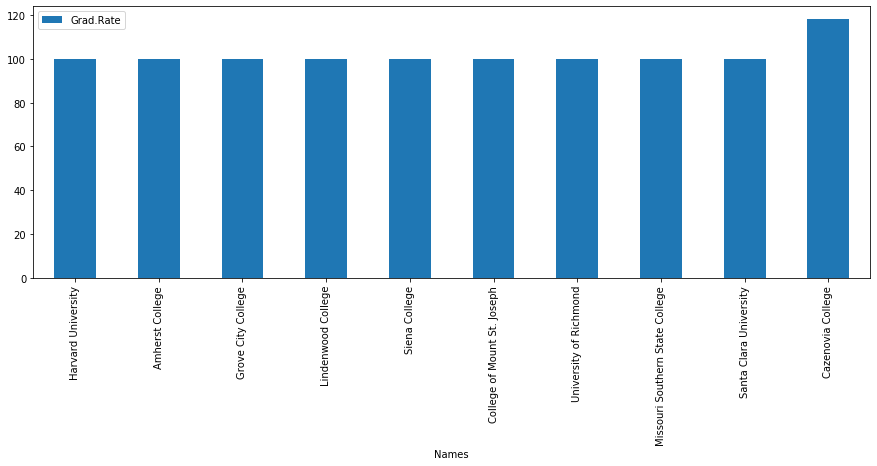

In [81]:
data.groupby(by=['Names'])['Grad.Rate'].sum().reset_index().sort_values(['Grad.Rate']).tail(10).plot(x='Names',
                                                                                                           y='Grad.Rate',
                                                                                                           kind='bar',
                                                                                                           figsize=(15,5))
plt.show()

## 2.2Scale the variables and write the inference for using the type of scaling function for this case study

In [40]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [41]:
lapp,uapp=remove_outlier(data_df['Apps'])
data_df['Apps']=np.where(data_df['Apps']>uapp,uapp,data_df['Apps'])
data_df['Apps']=np.where(data_df['Apps']<lapp,lapp,data_df['Apps'])

lAccept,uAccept=remove_outlier(data_df['Accept'])
data_df['Accept']=np.where(data_df['Accept']>uAccept,uAccept,data_df['Accept'])
data_df['Accept']=np.where(data_df['Accept']<lAccept,lAccept,data_df['Accept'])

lenn,uenn=remove_outlier(data_df['Enroll'])
data_df['Enroll']=np.where(data_df['Enroll']>uenn,uenn,data_df['Enroll'])
data_df['Enroll']=np.where(data_df['Enroll']<lenn,lenn,data_df['Enroll'])


lt10,ut10=remove_outlier(data_df['Top10perc'])
data_df['Top10perc']=np.where(data_df['Top10perc']>ut10,ut10,data_df['Top10perc'])
data_df['Top10perc']=np.where(data_df['Top10perc']<lt10,lt10,data_df['Top10perc'])

lt25,ut25=remove_outlier(data_df['Top25perc'])
data_df['Top25perc']=np.where(data_df['Top25perc']>ut25,ut25,data_df['Top25perc'])
data_df['Top25perc']=np.where(data_df['Top25perc']<lt25,lt25,data_df['Top25perc'])

lt25,ut25=remove_outlier(data_df['Top25perc'])
data_df['Top25perc']=np.where(data_df['Top25perc']>ut25,ut25,data_df['Top25perc'])
data_df['Top25perc']=np.where(data_df['Top25perc']<lt25,lt25,data_df['Top25perc'])

lfgrad,ufgrad=remove_outlier(data_df['F.Undergrad'])
data_df['F.Undergrad']=np.where(data_df['F.Undergrad']>ufgrad,ufgrad,data_df['F.Undergrad'])
data_df['F.Undergrad']=np.where(data_df['F.Undergrad']<lfgrad,lfgrad,data_df['F.Undergrad'])

lpgrad,upgrad=remove_outlier(data_df['P.Undergrad'])
data_df['P.Undergrad']=np.where(data_df['P.Undergrad']>upgrad,upgrad,data_df['P.Undergrad'])
data_df['P.Undergrad']=np.where(data_df['P.Undergrad']<lpgrad,lpgrad,data_df['P.Undergrad'])

los,uos=remove_outlier(data_df['Outstate'])
data_df['Outstate']=np.where(data_df['Outstate']>uos,uos,data_df['Outstate'])
data_df['Outstate']=np.where(data_df['Outstate']<los,los,data_df['Outstate'])

lrb,urb=remove_outlier(data_df['Room.Board'])
data_df['Room.Board']=np.where(data_df['Room.Board']>urb,urb,data_df['Room.Board'])
data_df['Room.Board']=np.where(data_df['Room.Board']<lrb,lrb,data_df['Room.Board'])

lbk,ubk=remove_outlier(data_df['Books'])
data_df['Books']=np.where(data_df['Books']>ubk,ubk,data_df['Books'])
data_df['Books']=np.where(data_df['Books']<lbk,lbk,data_df['Books'])

lper,uper=remove_outlier(data_df['Personal'])
data_df['Personal']=np.where(data_df['Personal']>uper,uper,data_df['Personal'])
data_df['Personal']=np.where(data_df['Personal']<lper,lper,data_df['Personal'])

lphd,uphd=remove_outlier(data_df['PhD'])
data_df['PhD']=np.where(data_df['PhD']>uphd,uphd,data_df['PhD'])
data_df['PhD']=np.where(data_df['PhD']<lphd,lphd,data_df['PhD'])

lter,uter=remove_outlier(data_df['Terminal'])
data_df['Terminal']=np.where(data_df['Terminal']>uter,uter,data_df['Terminal'])
data_df['Terminal']=np.where(data_df['Terminal']<lter,lter,data_df['Terminal'])


lsfr,usfr=remove_outlier(data_df['S.F.Ratio'])
data_df['S.F.Ratio']=np.where(data_df['S.F.Ratio']>usfr,usfr,data_df['S.F.Ratio'])
data_df['S.F.Ratio']=np.where(data_df['S.F.Ratio']<lsfr,lsfr,data_df['S.F.Ratio'])

lalum,ualum=remove_outlier(data_df['perc.alumni'])
data_df['perc.alumni']=np.where(data_df['perc.alumni']>ualum,ualum,data_df['perc.alumni'])
data_df['perc.alumni']=np.where(data_df['perc.alumni']<lalum,lalum,data_df['perc.alumni'])

lexp,uexp=remove_outlier(data_df['Expend'])
data_df['Expend']=np.where(data_df['Expend']>uexp,uexp,data_df['Expend'])
data_df['Expend']=np.where(data_df['Expend']<lexp,lexp,data_df['Expend'])

lgr,ugr=remove_outlier(data_df['Grad.Rate'])
data_df['Grad.Rate']=np.where(data_df['Grad.Rate']>ugr,ugr,data_df['Grad.Rate'])
data_df['Grad.Rate']=np.where(data_df['Grad.Rate']<lgr,lgr,data_df['Grad.Rate'])

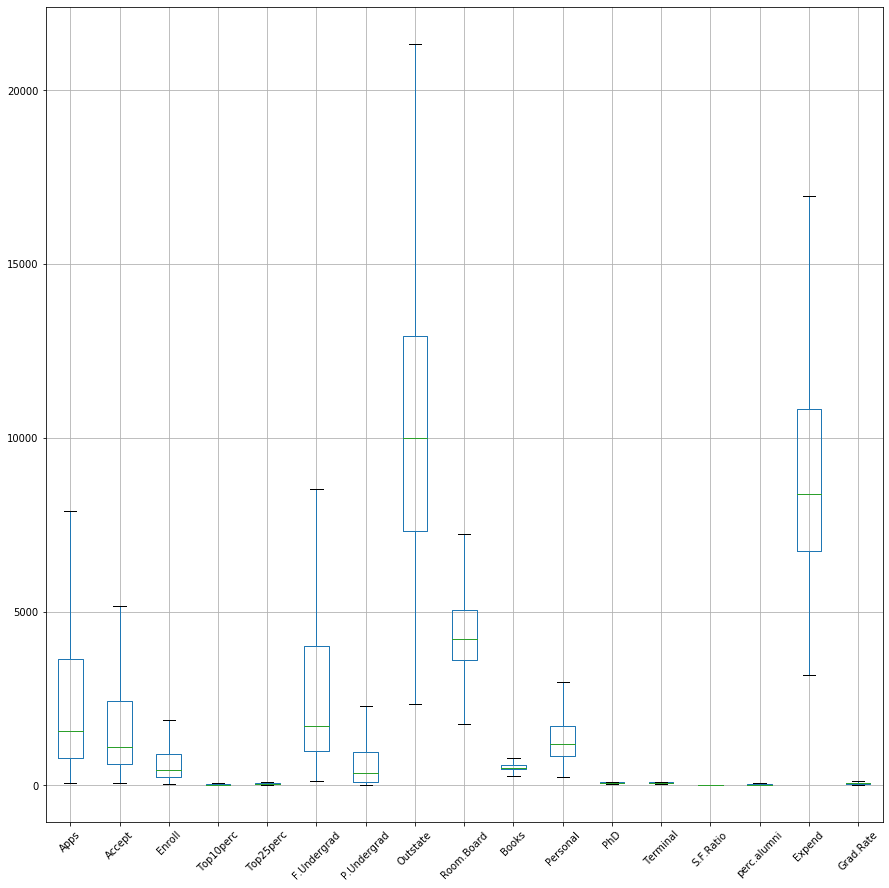

In [83]:
plt.subplots(figsize=(15,15))
data_df.boxplot(figsize=(15,15),rot=45)

In [43]:
from scipy import stats
from scipy.stats import zscore

In [44]:
data_new=data_df.apply(zscore)
data_new.head()

Apps    Accept    Enroll  Top10perc  Top25perc  F.Undergrad  \
0 -0.376493 -0.337830  0.106380  -0.246780  -0.191827    -0.018769   
1 -0.159195  0.116744 -0.260441  -0.696290  -1.353911    -0.093626   
2 -0.472336 -0.426511 -0.569343  -0.310996  -0.292878    -0.703966   
3 -0.889994 -0.917871 -0.918613   2.129202   1.677612    -0.898889   
4 -0.982532 -1.051221 -1.062533  -0.696290  -0.596031    -0.995610   

   P.Undergrad  Outstate  Room.Board     Books  Personal       PhD  Terminal  \
0    -0.166083 -0.746480   -0.968324 -0.776567  1.438500 -0.174045 -0.123239   
1     0.797856  0.457762    1.921680  1.828605  0.289289 -2.745731 -2.785068   
2    -0.777974  0.201488   -0.555466 -1.210762 -0.260691 -1.240354 -0.952900   
3    -0.828267  0.626954    1.004218 -0.776567 -0.736792  1.205884  1.190391   
4     0.297726 -0.716623   -0.216006  2.219381  0.289289  0.202299 -0.538069   

   S.F.Ratio  perc.alumni    Expend  Grad.Rate  
0   1.070602    -0.870466 -0.630916  -0.319205  
1  -0.489511    -0.545726  0.396097  -0.552693  
2  -0.304413     0.590864 -0.131845  -0.669437  
3  -1.679429     1.159159  2.287940  -0.377577  
4  -0.568839    -1.682316  0.512468  -2.916759

## 2.3) Comment on the comparison between covariance and the correlation matrix.

In [45]:
cov_matrix = np.cov(data_new.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[ 1.00128866e+00  9.56537704e-01  8.98039052e-01  3.21756324e-01
   3.64960691e-01  8.62111140e-01  5.20492952e-01  6.54209711e-02
   1.87717056e-01  2.36441941e-01  2.30243993e-01  4.64521757e-01
   4.35037784e-01  1.26573895e-01 -1.01288006e-01  2.43248206e-01
   1.50997775e-01]
 [ 9.56537704e-01  1.00128866e+00  9.36482483e-01  2.23586208e-01
   2.74033187e-01  8.98189799e-01  5.73428908e-01 -5.00874847e-03
   1.19740419e-01  2.08974091e-01  2.56676290e-01  4.27891234e-01
   4.03929238e-01  1.88748711e-01 -1.65728801e-01  1.62016688e-01
   7.90839722e-02]
 [ 8.98039052e-01  9.36482483e-01  1.00128866e+00  1.71977357e-01
   2.30730728e-01  9.68548601e-01  6.42421828e-01 -1.55856056e-01
  -2.38762560e-02  2.02317274e-01  3.39785395e-01  3.82031198e-01
   3.54835877e-01  2.74622251e-01 -2.23009677e-01  5.42906862e-02
  -2.32810071e-02]
 [ 3.21756324e-01  2.23586208e-01  1.71977357e-01  1.00128866e+00
   9.15052977e-01  1.11358019e-01 -1.80240778e-01  5.62884044e-

In [46]:
data_df.corr(method='pearson')
data_new.corr()

Apps    Accept    Enroll  Top10perc  Top25perc  F.Undergrad  \
Apps         1.000000  0.955307  0.896883   0.321342   0.364491     0.861002   
Accept       0.955307  1.000000  0.935277   0.223298   0.273681     0.897034   
Enroll       0.896883  0.935277  1.000000   0.171756   0.230434     0.967302   
Top10perc    0.321342  0.223298  0.171756   1.000000   0.913875     0.111215   
Top25perc    0.364491  0.273681  0.230434   0.913875   1.000000     0.181196   
F.Undergrad  0.861002  0.897034  0.967302   0.111215   0.181196     1.000000   
P.Undergrad  0.519823  0.572691  0.641595  -0.180009  -0.099295     0.696130   
Outstate     0.065337 -0.005002 -0.155655   0.562160   0.489569    -0.226166   
Room.Board   0.187475  0.119586 -0.023846   0.357366   0.330987    -0.054476   
Books        0.236138  0.208705  0.202057   0.153452   0.169761     0.207879   
Personal     0.229948  0.256346  0.339348  -0.116730  -0.086810     0.359783   
PhD          0.463924  0.427341  0.381540   0.544048   0.551461     0.361564   
Terminal     0.434478  0.403409  0.354379   0.506748   0.527654     0.335054   
S.F.Ratio    0.126411  0.188506  0.274269  -0.387926  -0.297233     0.324504   
perc.alumni -0.101158 -0.165516 -0.222723   0.455797   0.416832    -0.285457   
Expend       0.242935  0.161808  0.054221   0.657039   0.572905     0.000371   
Grad.Rate    0.150803  0.078982 -0.023251   0.493670   0.478985    -0.082239   

             P.Undergrad  Outstate  Room.Board     Books  Personal       PhD  \
Apps            0.519823  0.065337    0.187475  0.236138  0.229948  0.463924   
Accept          0.572691 -0.005002    0.119586  0.208705  0.256346  0.427341   
Enroll          0.641595 -0.155655   -0.023846  0.202057  0.339348  0.381540   
Top10perc      -0.180009  0.562160    0.357366  0.153452 -0.116730  0.544048   
Top25perc      -0.099295  0.489569    0.330987  0.169761 -0.086810  0.551461   
F.Undergrad     0.696130 -0.226166   -0.054476  0.207879  0.359783  0.361564   
P.Undergrad     1.000000 -0.354216   -0.067638  0.122529  0.344053  0.127663   
Outstate       -0.354216  1.000000    0.655489  0.005110 -0.325609  0.391321   
Room.Board     -0.067638  0.655489    1.000000  0.108924 -0.219554  0.341469   
Books           0.122529  0.005110    0.108924  1.000000  0.239863  0.136390   
Personal        0.344053 -0.325609   -0.219554  0.239863  1.000000 -0.011684   
PhD             0.127663  0.391321    0.341469  0.136390 -0.011684  1.000000   
Terminal        0.122152  0.412579    0.379270  0.159318 -0.031971  0.862928   
S.F.Ratio       0.370607 -0.573683   -0.376430 -0.008536  0.173913 -0.129390   
perc.alumni    -0.419334  0.565736    0.272393 -0.042832 -0.305753  0.248877   
Expend         -0.201929  0.775328    0.580622  0.149983 -0.163271  0.510529   
Grad.Rate      -0.265158  0.572458    0.425790 -0.008051 -0.290894  0.310019   

             Terminal  S.F.Ratio  perc.alumni    Expend  Grad.Rate  
Apps         0.434478   0.126411    -0.101158  0.242935   0.150803  
Accept       0.403409   0.188506    -0.165516  0.161808   0.078982  
Enroll       0.354379   0.274269    -0.222723  0.054221  -0.023251  
Top10perc    0.506748  -0.387926     0.455797  0.657039   0.493670  
Top25perc    0.527654  -0.297233     0.416832  0.572905   0.478985  
F.Undergrad  0.335054   0.324504    -0.285457  0.000371  -0.082239  
P.Undergrad  0.122152   0.370607    -0.419334 -0.201929  -0.265158  
Outstate     0.412579  -0.573683     0.565736  0.775328   0.572458  
Room.Board   0.379270  -0.376430     0.272393  0.580622   0.425790  
Books        0.159318  -0.008536    -0.042832  0.149983  -0.008051  
Personal    -0.031971   0.173913    -0.305753 -0.163271  -0.290894  
PhD          0.862928  -0.129390     0.248877  0.510529   0.310019  
Terminal     1.000000  -0.150993     0.266033  0.524068   0.292803  
S.F.Ratio   -0.150993   1.000000    -0.412101 -0.654376  -0.308525  
perc.alumni  0.266033  -0.412101     1.000000  0.462922   0.491408  
Expend       0.524068  -0.65437

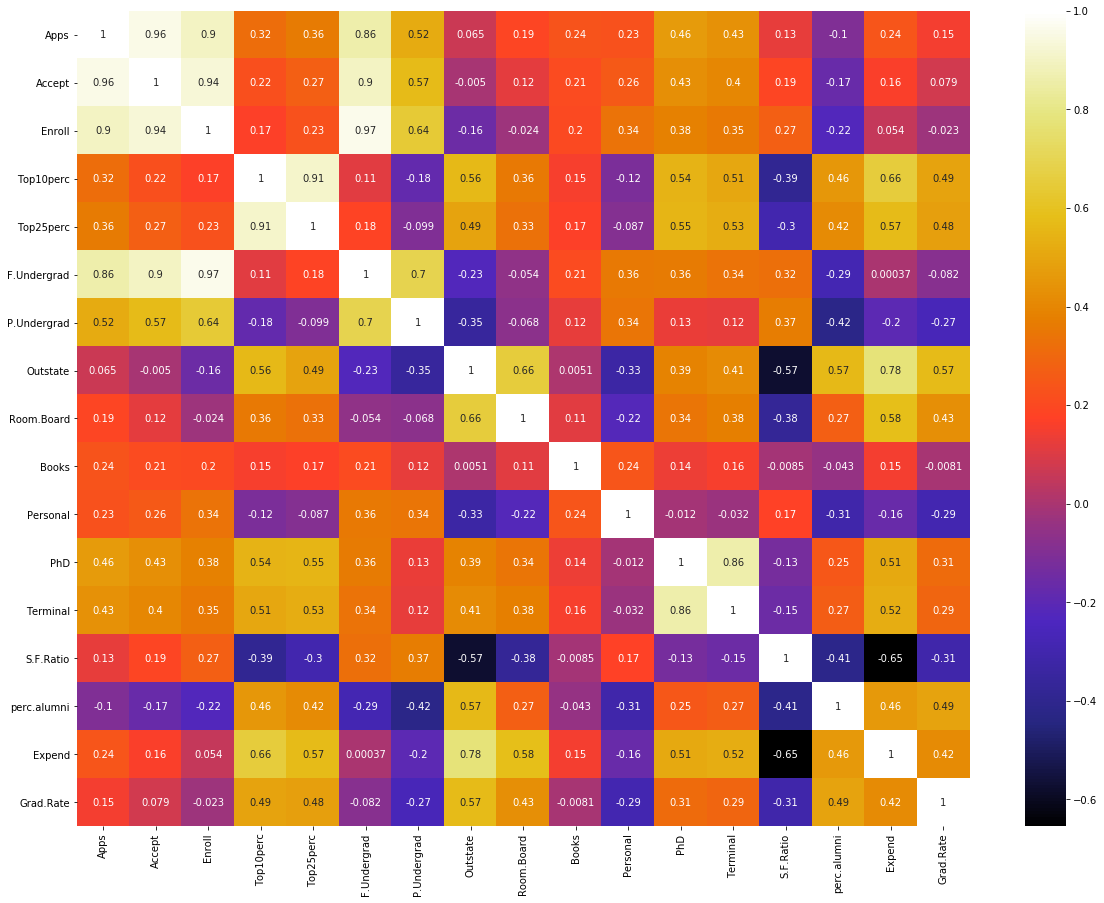

In [47]:
plt.subplots(figsize=(20,15))
sns.heatmap(data_new.corr(), annot=True, cmap='CMRmap')  # plot the correlation coefficients as a heatmap

## 2.4 Check the dataset for outliers before and after scaling. Draw your inferences from this exercise.

In [61]:
from scipy import stats
from scipy.stats import zscore

In [65]:
data_df2=data.drop(["Names"],axis=1)
data_new2=data_df2.apply(zscore)
data_new2.head()

Apps    Accept    Enroll  Top10perc  Top25perc  F.Undergrad  \
0 -0.346882 -0.321205 -0.063509  -0.258583  -0.191827    -0.168116   
1 -0.210884 -0.038703 -0.288584  -0.655656  -1.353911    -0.209788   
2 -0.406866 -0.376318 -0.478121  -0.315307  -0.292878    -0.549565   
3 -0.668261 -0.681682 -0.692427   1.840231   1.677612    -0.658079   
4 -0.726176 -0.764555 -0.780735  -0.655656  -0.596031    -0.711924   

   P.Undergrad  Outstate  Room.Board     Books  Personal       PhD  Terminal  \
0    -0.209207 -0.746356   -0.964905 -0.602312  1.270045 -0.163028 -0.115729   
1     0.244307  0.457496    1.909208  1.215880  0.235515 -2.675646 -3.378176   
2    -0.497090  0.201305   -0.554317 -0.905344 -0.259582 -1.204845 -0.931341   
3    -0.520752  0.626633    0.996791 -0.602312 -0.688173  1.185206  1.175657   
4     0.009005 -0.716508   -0.216723  1.518912  0.235515  0.204672 -0.523535   

   S.F.Ratio  perc.alumni    Expend  Grad.Rate  
0   1.013776    -0.867574 -0.501910  -0.318252  
1  -0.477704    -0.544572  0.166110  -0.551262  
2  -0.300749     0.585935 -0.177290  -0.667767  
3  -1.615274     1.151188  1.792851  -0.376504  
4  -0.553542    -1.675079  0.241803  -2.939613

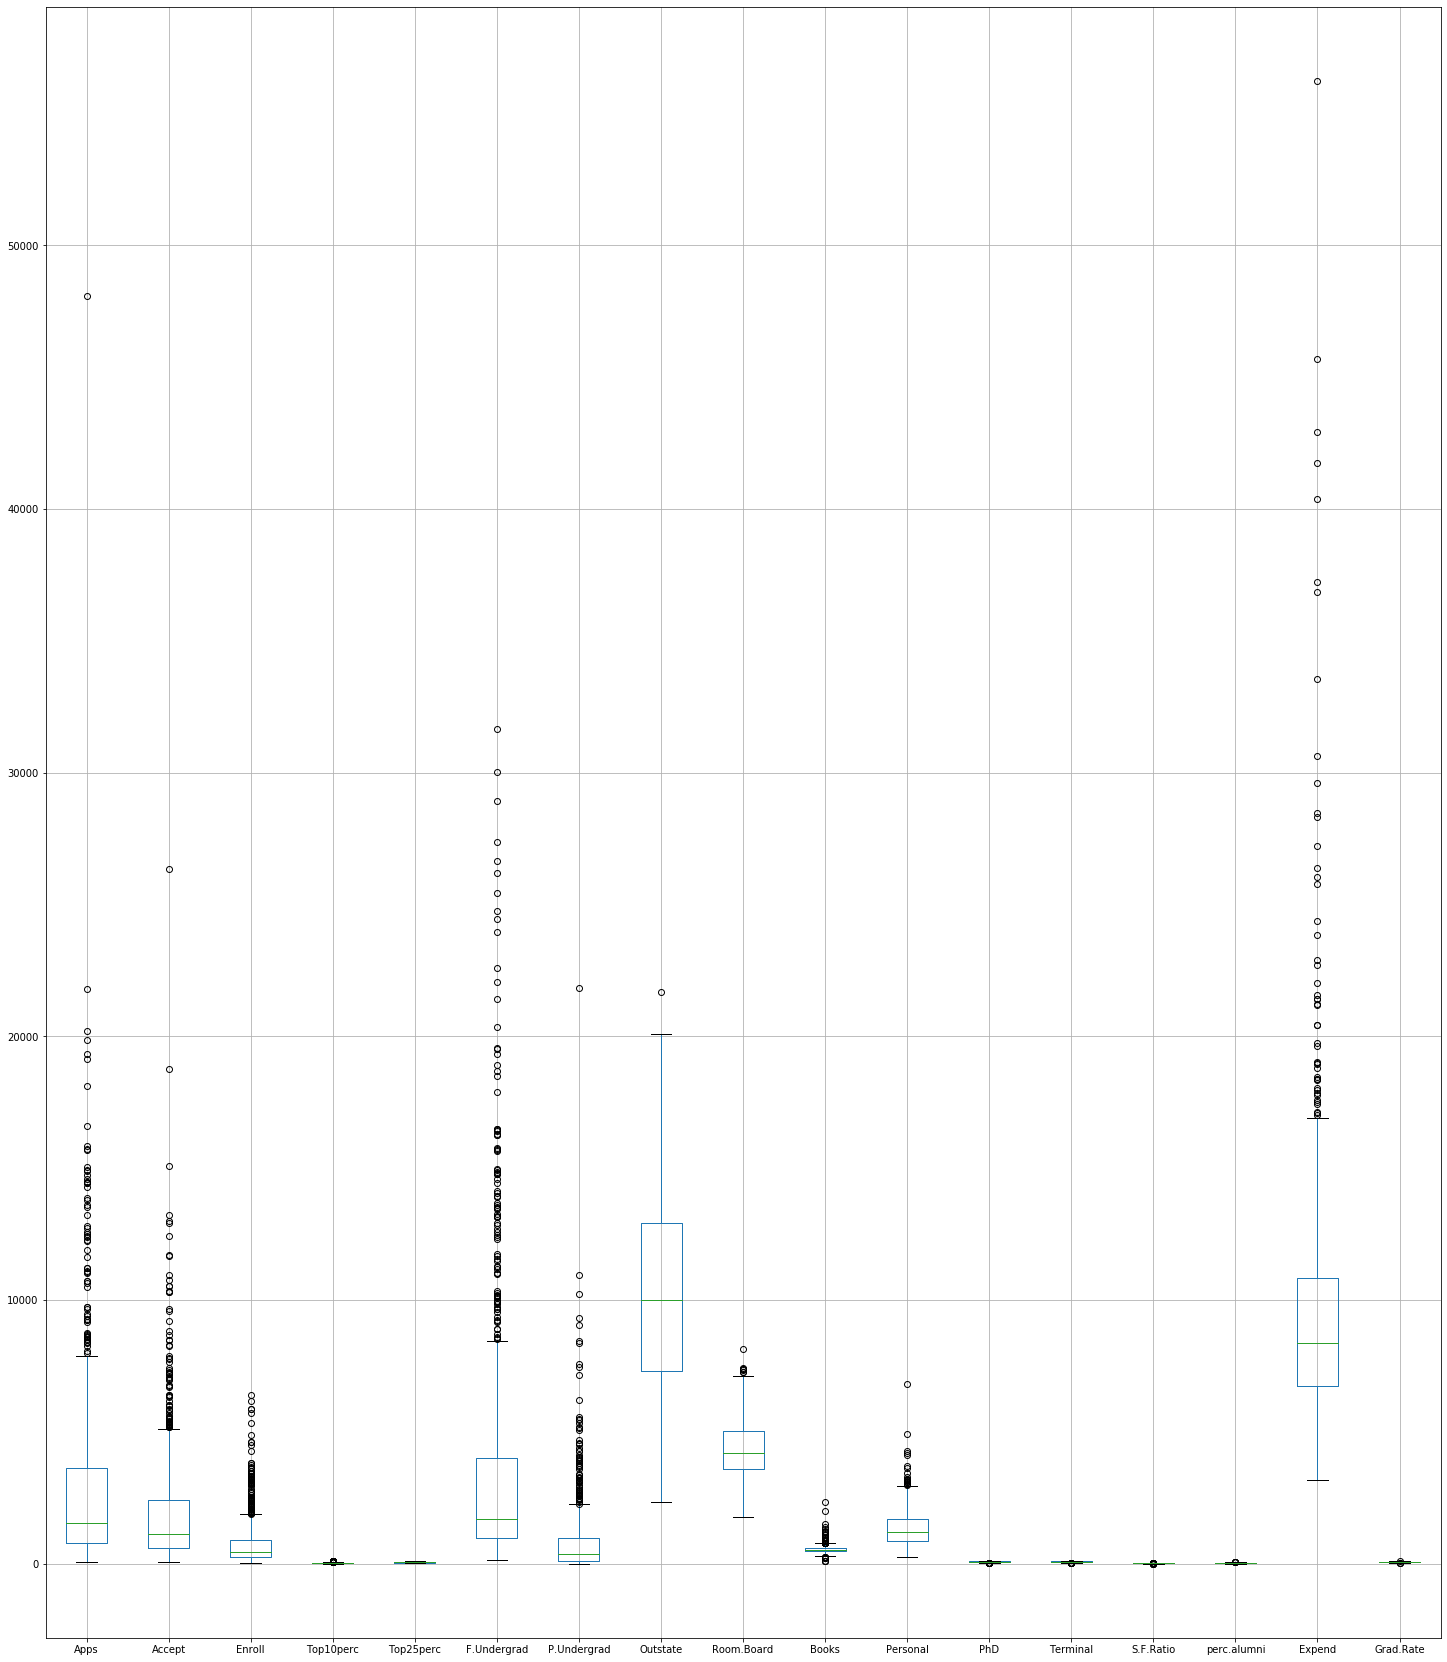

In [66]:
plt.subplots(figsize=(25,30))
data_df2.boxplot(figsize=(25,30))

## 2.5 Build the covariance matrix, eigenvalues, and eigenvector.

In [49]:
cov_matrix = np.cov(data_new.T)
print('Covariance Matrix \n', cov_matrix)

Covariance Matrix 
 [[ 1.00128866e+00  9.56537704e-01  8.98039052e-01  3.21756324e-01
   3.64960691e-01  8.62111140e-01  5.20492952e-01  6.54209711e-02
   1.87717056e-01  2.36441941e-01  2.30243993e-01  4.64521757e-01
   4.35037784e-01  1.26573895e-01 -1.01288006e-01  2.43248206e-01
   1.50997775e-01]
 [ 9.56537704e-01  1.00128866e+00  9.36482483e-01  2.23586208e-01
   2.74033187e-01  8.98189799e-01  5.73428908e-01 -5.00874847e-03
   1.19740419e-01  2.08974091e-01  2.56676290e-01  4.27891234e-01
   4.03929238e-01  1.88748711e-01 -1.65728801e-01  1.62016688e-01
   7.90839722e-02]
 [ 8.98039052e-01  9.36482483e-01  1.00128866e+00  1.71977357e-01
   2.30730728e-01  9.68548601e-01  6.42421828e-01 -1.55856056e-01
  -2.38762560e-02  2.02317274e-01  3.39785395e-01  3.82031198e-01
   3.54835877e-01  2.74622251e-01 -2.23009677e-01  5.42906862e-02
  -2.32810071e-02]
 [ 3.21756324e-01  2.23586208e-01  1.71977357e-01  1.00128866e+00
   9.15052977e-01  1.11358019e-01 -1.80240778e-01  5.62884044e-01

In [50]:
eig_vals,eig_vecs=np.linalg.eig(cov_matrix)
print('Eigan values are\n',eig_vals)
print('Eigan vectors\n',eig_vecs)

Eigan values are
 [5.6625219  4.89470815 1.12636744 1.00397659 0.87218426 0.7657541
 0.58491404 0.5445048  0.42352336 0.38101777 0.24701456 0.02239369
 0.03789395 0.14726392 0.13434483 0.09883384 0.07469003]
Eigan vectors
 [[-2.62171542e-01  3.14136258e-01  8.10177245e-02 -9.87761685e-02
  -2.19898081e-01  2.18800617e-03 -2.83715076e-02 -8.99498102e-02
   1.30566998e-01 -1.56464458e-01 -8.62132843e-02  1.82169814e-01
  -5.99137640e-01  8.99775288e-02  8.88697944e-02  5.49428396e-01
   5.41453698e-03]
 [-2.30562461e-01  3.44623583e-01  1.07658626e-01 -1.18140437e-01
  -1.89634940e-01 -1.65212882e-02 -1.29584896e-02 -1.37606312e-01
   1.42275847e-01 -1.49209799e-01 -4.25899061e-02 -3.91041719e-01
   6.61496927e-01  1.58861886e-01  4.37945938e-02  2.91572312e-01
   1.44582845e-02]
 [-1.89276397e-01  3.82813322e-01  8.55296892e-02 -9.30717094e-03
  -1.62314818e-01 -6.80794143e-02 -1.52403625e-02 -1.44216938e-01
   5.08712481e-02 -6.48997860e-02 -4.38408622e-02  7.16684935e-01
   2.33235272

We see that there are totally 4 eigen values greater than 1

## 2.6)Write the explicit form of the first PC (in terms of Eigen Vectors).

In [92]:
evals, evecs = np.linalg.eig(cov_matrix)
    #Assume that the eigenvalues are ordered from large to small and that the
print('First Eigan Value is\n',evals[0])
print('First Eigan Vector is \n',evecs[:, 0])

First Eigan Value is
 5.662521896309492
First Eigan Vector is 
 [-0.26217154 -0.23056246 -0.1892764  -0.33887452 -0.33469053 -0.16329301
 -0.02247971 -0.28354729 -0.24418659 -0.09670828  0.03522996 -0.3264107
 -0.32311598  0.16315164 -0.18661083 -0.32895585 -0.23882245]


## 2.7) Discuss the cumulative values of the eigenvalues. How does it help you to decide on the optimum number of principal components? What do the eigenvectors indicate? Perform PCA and export the data of the Principal Component scores into a data frame.

In [51]:
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 33.26608367  62.02142867  68.63859223  74.53673619  79.66062886
  84.15926753  87.59551019  90.79435736  93.28246491  95.52086136
  96.97201814  97.83716159  98.62640821  99.20703552  99.64582321
  99.86844192 100.        ]


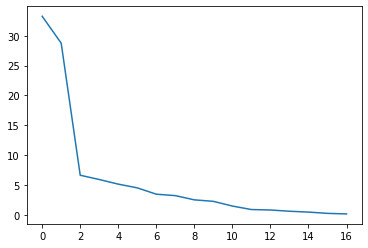

In [52]:
plt.plot(var_exp)

## Visually we can observe that their is steep drop in variance explained with increase in number of PC's. We will proceed with 11 components here. But depending on requirement 96% variation

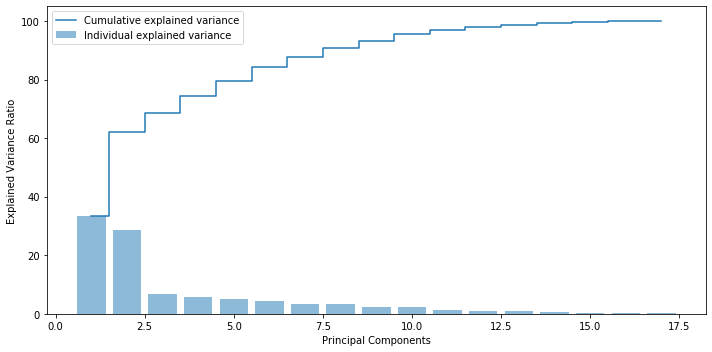

In [53]:
# Ploting 
plt.figure(figsize=(10 , 5))
plt.bar(range(1, eig_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, eig_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

In [54]:
from sklearn.decomposition import PCA

In [84]:
pca = PCA(n_components=11)
data_reduced = pca.fit_transform(data_new)
print('Reduced Data\n',data_reduced.transpose())

Reduced Data
 [[-1.60249937 -1.80467545 -1.60828257 ... -0.57688267  6.570952
  -0.47739307]
 [ 0.99368301 -0.07041499 -1.38279212 ...  0.01779846 -1.18493014
   1.04394672]
 [ 0.03004476  2.12212752 -0.50151255 ...  0.32216034  1.32596561
  -1.42543835]
 ...
 [-0.45535195  1.12657113  0.27307114 ... -0.05556442 -0.0086841
   0.65503827]
 [-0.3236444  -0.49773599 -0.69084034 ... -0.48774196 -0.41281587
   1.74539561]
 [ 0.30643518  0.17281667  0.07444668 ... -0.69572349 -0.45128505
  -0.19028373]]


In [85]:
print('Principal Components are\n',pca.components_)

Principal Components are
 [[ 2.62171542e-01  2.30562461e-01  1.89276397e-01  3.38874521e-01
   3.34690532e-01  1.63293010e-01  2.24797091e-02  2.83547285e-01
   2.44186588e-01  9.67082754e-02 -3.52299594e-02  3.26410696e-01
   3.23115980e-01 -1.63151642e-01  1.86610828e-01  3.28955847e-01
   2.38822447e-01]
 [ 3.14136258e-01  3.44623583e-01  3.82813322e-01 -9.93191661e-02
  -5.95055011e-02  3.98636372e-01  3.57550046e-01 -2.51863617e-01
  -1.31909124e-01  9.39739472e-02  2.32439594e-01  5.51390195e-02
   4.30332048e-02  2.59804556e-01 -2.57092552e-01 -1.60008951e-01
  -1.67523664e-01]
 [-8.10177245e-02 -1.07658626e-01 -8.55296892e-02  7.88293849e-02
   5.07938247e-02 -7.37077827e-02 -4.03568700e-02 -1.49394795e-02
   2.11379165e-02  6.97121128e-01  5.30972806e-01 -8.11134044e-02
  -5.89785929e-02 -2.74150657e-01 -1.03715887e-01  1.84205687e-01
  -2.45335837e-01]
 [ 9.87761685e-02  1.18140437e-01  9.30717094e-03 -3.69115031e-01
  -4.16824361e-01  1.39504424e-02  2.25351078e-01  2.629753

In [57]:
pca.explained_variance_ratio_

array([0.33266084, 0.28755345, 0.06617164, 0.05898144, 0.05123893,
       0.04498639, 0.03436243, 0.03198847, 0.02488108, 0.02238396,
       0.01451157])

In [58]:
var=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3)*100)
var

array([33.3, 62.1, 68.7, 74.6, 79.7, 84.2, 87.6, 90.8, 93.3, 95.5, 97. ])

In [59]:
df_comp = pd.DataFrame(pca.components_,columns=list(data_new))
df_comp.head()

Apps    Accept    Enroll  Top10perc  Top25perc  F.Undergrad  \
0  0.262172  0.230562  0.189276   0.338875   0.334691     0.163293   
1  0.314136  0.344624  0.382813  -0.099319  -0.059506     0.398636   
2 -0.081018 -0.107659 -0.085530   0.078829   0.050794    -0.073708   
3  0.098776  0.118140  0.009307  -0.369115  -0.416824     0.013950   
4  0.219898  0.189635  0.162315   0.157211   0.144449     0.102728   

   P.Undergrad  Outstate  Room.Board     Books  Personal       PhD  Terminal  \
0     0.022480  0.283547    0.244187  0.096708 -0.035230  0.326411  0.323116   
1     0.357550 -0.251864   -0.131909  0.093974  0.232440  0.055139  0.043033   
2    -0.040357 -0.014939    0.021138  0.697121  0.530973 -0.081113 -0.058979   
3     0.225351  0.262975    0.580894 -0.036156 -0.114983 -0.147261 -0.089008   
4    -0.095679  0.037275   -0.069108  0.035406 -0.000475 -0.550787 -0.590407   

   S.F.Ratio  perc.alumni    Expend  Grad.Rate  
0  -0.163152     0.186611  0.328956   0.238822  
1   0.259805    -0.257093 -0.160009  -0.167524  
2  -0.274151    -0.103716  0.184206  -0.245336  
3  -0.259486    -0.223982  0.213756  -0.036192  
4  -0.142843     0.128216 -0.022424   0.356843

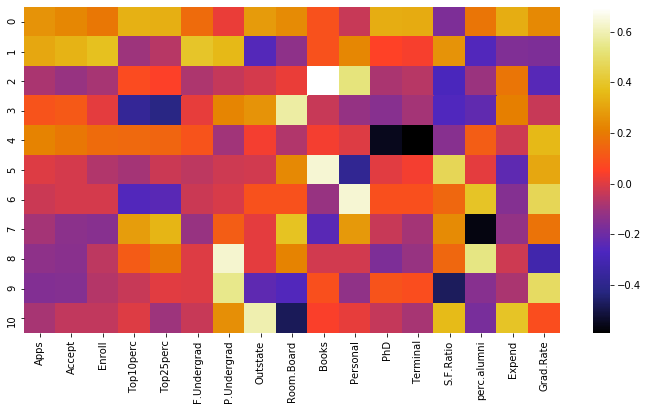

In [60]:
plt.figure(figsize=(12,6))
sns.heatmap(df_comp,cmap='CMRmap',)

## 2.8) Mention the business implication of using the Principal Component Analysis for this case study. [Hint: Write Interpretations of the Principal Components Obtained]

PCA also is a tool to reduce multidimensional data to lower dimensions while retaining most of the information. Eigan values and Eigan vectors calculated gives the magnitude and direction of the principal component.

Using principal component analysis we found that instead of analysing all the components it is better to analyse only 11 components.As analysing 11 components itself covers 96% of variables in the data set